In [1]:
# qbo.ipynb
# import modules to access netcdf files and plot data

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
# open a WACCM file containing a timeseries of monthly mean zonal mean zonal winds
# data prepared by R.Garcia

data_dir = "/glade/u/home/marsh/demo/sample_data/"
waccm_file = "concat_zm_f.e21.FWHIST.f19_f19_mg17.release-cesm2.1.3.110L.001.cam.h0_U.nc"

ds = xr.open_dataset(data_dir+waccm_file)

In [3]:
# extract winds at the equator

# find the latitude index at the equatory
iy = int(ds['lat'].size/2)
print('latitude:', ds['lat'].values[iy])

#extract the zonal wind at that location
ueq = ds['U'].isel(lat=iy).transpose()

latitude: 0.9473684210526301


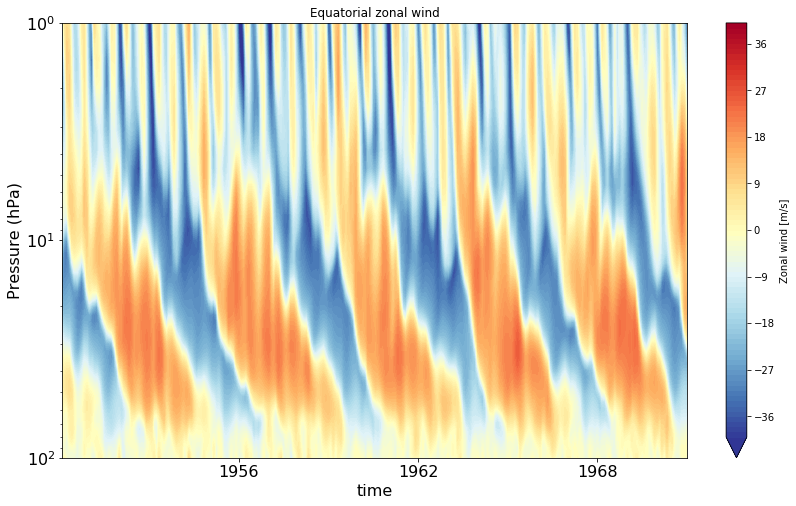

In [4]:
# create a time/height contour plot 
plt.figure(figsize=(14,8))

# instead of pcolormesh we can opt for smoothed filled contours
clevels = np.arange(-40,41,1)
ueq.plot.contourf(cmap='RdYlBu_r', levels = clevels, vmin=-40, vmax=40)

#control the look of the output
ax = plt.gca()

ax.set_ylim([100,1])
ax.set_yscale('log')
ax.set_ylabel('Pressure (hPa)')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)

plt.title('Equatorial zonal wind')

plt.show()

In [5]:
# create the x and y variables for the contour plot

y = ueq['lev']

# extract time and check the first value - it is 1950-02-01 i.e. the January mean
t = ueq['time']
print('start date:', t.values[0])

# a simple array for x - the number of months
x = np.arange(0,t.size,1)

# extract the years from time for plot labels
years = ueq['time.year'].values
print(years[0:t.size:12])

start date: 1950-02-01 00:00:00
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970]


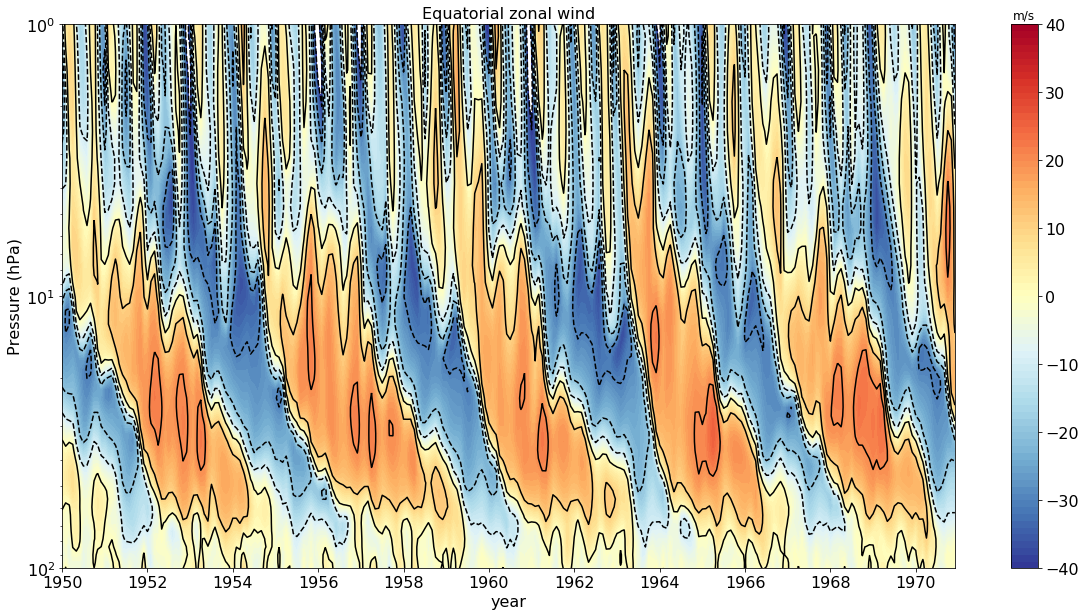

In [6]:
plt.figure(figsize=(20,10))

clevels = np.arange(-40,41,1)

# plot filled contours
im = plt.contourf(x, y, ueq, levels = clevels, cmap='RdYlBu_r', vmin=-40, vmax=40)

cb = plt.colorbar(im)
cb.ax.tick_params(labelsize=16)
cb.ax.set_title('m/s')

clevels = np.arange(-40,41,10)
cb.set_ticks(clevels)

#over plot line contours
plt.contour(x, y, ueq, colors='black', levels=clevels)

#control the look of the output
plt.title('Equatorial zonal wind')
ax = plt.gca()

ax.set_ylim([100,1])
ax.set_yscale('log')
ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('year')
ax.set_xticks(np.arange(0,x.size,24))
ax.set_xticklabels(years[np.arange(0,x.size,24)])

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)

plt.savefig("QBO.png", bbox_inches="tight")

plt.show()